# MATH 210 Introduction to Mathematical Computing

**February 25, 2026**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Riemann Sums

Let $f(x)$ be a function defined on the interval $[a,b]$. Choose an integer $N$ an define the partition of $N+1$ equally spaced points

$$
x_k = a + k \Delta x \ , \ \ \Delta x = \frac{b - a}{N} \ , \ \ k = 0,1,\dots,N
$$

The **right Riemann sum** (for $f(x)$ over $[a,b]$ with $N+1$ equally spaced points) is

$$
R_N(f) = \Delta x \sum_{k=1}^N f(x_k)
$$

The **left Riemann sum** (for $f(x)$ over $[a,b]$ with $N+1$ equally spaced points) is

$$
L_N(f) = \Delta x \sum_{k=1}^N f(x_{k-1})
$$

The **midpoint Riemann sum** (for $f(x)$ over $[a,b]$ with $N+1$ equally spaced points) is

$$
M_N(f) = \Delta x \sum_{k=1}^N f \left( \frac{x_k + x_{k-1}}{2} \right)
$$

Write a function called `riemann` which takes function `f`, numbers `a` and `b`, integer `N`, text `method`, and returns the corresponding Riemann sum.

In [2]:
def riemann(f,a,b,N,method):
    x = np.linspace(a,b,N + 1)
    y = f(x)
    dx = (b - a)/N
    if method == "left":
        return dx*np.sum(y[:-1])
    elif method == "right":
        return dx*np.sum(y[1:])
    elif method == "midpoint":
        xmid = x[:-1] + dx/2
        ymid = f(xmid)
        return dx*np.sum(f(xmid))
    else:
        print("Unrecognized method.")
        return 0.0

In [3]:
f = lambda x: x**2 + 1
a = 0; b = 1; N = 10; method = "left";
I = riemann(f,a,b,N,method)
print(I,4/3)

1.2850000000000001 1.3333333333333333


In [4]:
f = lambda x: 1/(x**2 + 1)
a = 0; b = 1; N = 20; method = "right";
I = riemann(f,a,b,N,method)
print(I,np.pi/4)

0.7727939967385322 0.7853981633974483


In [5]:
f = lambda x: np.cos(x)
a = -np.pi/2; b = np.pi/2; N = 100; method = "midpoint";
I = riemann(f,a,b,N,method)
print(I,2.0)

2.000082249070986 2.0


Approximate a definite integral for a function $f(x)$ such that there is no simple formula for the antiderivative:

$$
\int_{\pi/6}^{\pi/3} \frac{dx}{\sqrt{\tan(x)}}
$$

First, plot the function:

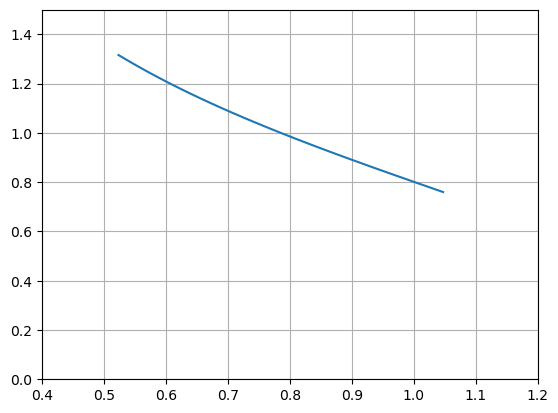

In [8]:
x = np.linspace(np.pi/6,np.pi/3,100)
y = 1/np.sqrt(np.tan(x))
plt.plot(x,y), plt.xlim([0.4,1.2]), plt.ylim([0,1.5]), plt.grid(True)
plt.show()

We can estimate the integral just by looking at it! Should be around 0.5(0.8) + 0.5(0.5)(0.6) = 0.4 + 0.15 = 0.55.

In [10]:
f = lambda x: 1/np.sqrt(np.tan(x))
I = riemann(f,np.pi/6,np.pi/3,1000,"midpoint")
print(I)

0.5299545096879273
